## 웹크롤링

In [150]:
! pip install selenium

In [151]:
from selenium import webdriver
webdriver.__version__

'4.1.0'

In [153]:
from selenium.webdriver.chrome.service import Service 

In [159]:
ser = Service('../chromedriver/chromedriver.exe')

In [160]:
driver = webdriver.Chrome(service = ser)

In [161]:
url = 'https://www.naver.com/'
driver.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url
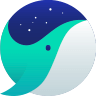
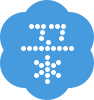

In [165]:
html=driver.page_source
html

In [180]:
# 예제 2-40
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''


In [181]:
html

"\n<html>\n    <head>\n    </head>\n    <body>\n        <h1> 우리동네시장</h1>\n            <div class = 'sale'>\n                <p id='fruits1' class='fruits'>\n                    <span class = 'name'> 바나나 </span>\n                    <span class = 'price'> 3000원 </span>\n                    <span class = 'inventory'> 500개 </span>\n                    <span class = 'store'> 가나다상회 </span>\n                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n                </p>\n            </div>\n            <div class = 'prepare'>\n                <p id='fruits2' class='fruits'>\n                    <span class ='name'> 파인애플 </span>\n                </p>\n            </div>\n    </body>\n</html>\n"

In [168]:
! pip install bs4

In [169]:
from bs4 import BeautifulSoup

In [182]:
html
soup = BeautifulSoup(html, 'html.parser')
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [189]:
tags_span = soup.select('span')
len(tags_span)
type(tags_span)


bs4.element.ResultSet

In [193]:
tags_p = soup.select('p')
print(len(tags_p))
tags_p

2


[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [194]:
## id

soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [199]:
## class

soup.select('.price')
soup.select('.inventory')
print(soup.select('.name'))
print(soup.select('span.name'))

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


In [200]:
soup.select ('#fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [205]:
# 하나의 결과 4가지 방법 

soup.select ('#fruits1 > span.name')
soup.select ('div.sale > #fruits1 > span.name')
soup.select ('div.sale > p.fruits > span.name')
soup.select ('div.sale span.name')

[<span class="name"> 바나나 </span>]

In [218]:
name = soup.select('span.name')
# len(name)
name_0 = name[0]
name_1 = name[1]
print(name_0)
print(name_1)

name_0.text
name_1.text

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


' 파인애플 '

In [234]:
tags_a = soup.select('a')
type(tags_a)
tags_a
# type(tags_a[0])
tags_a[0].text
tags_a[0]['href']
tags = tags_a[0]
tags['href']
tags

<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>

In [172]:
url = 'http://www.naver.com'
driver.get(url)

<html data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta conten
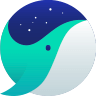
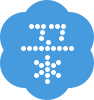

In [174]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
soup

In [175]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

In [235]:
ser = Service('../chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service=ser)